# 00 IMPORTS

In [ ]:
from google.colab import drive

mount_point = '/content/gdrive'
drive.mount(mount_point)

Mounted at /content/gdrive


In [ ]:
!pip install osmnx 
!pip install -U bokeh==2.2
!pip install -q holoviews
!pip install momepy
!pip install Rtree
!pip install squarify
!pip install folium==0.12.1 mapclassify
!pip install contextily==1.0rc2
!pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 4.7 MB/s 
     |████████████████████████████████| 1.0 MB 70.9 MB/s 
     |████████████████████████████████| 1.0 MB 48.7 MB/s 
     |████████████████████████████████| 11.2 MB 50.2 MB/s 
     |████████████████████████████████| 6.3 MB 33.9 MB/s 
     |████████████████████████████████| 62 kB 1.9 MB/s 
     |████████████████████████████████| 16.7 MB 61.0 MB/s 
     |████████████████████████████████| 930 kB 55.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. T

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.8 MB 12.5 MB/s 
  Created wheel for bokeh: filename=bokeh-2.2.0-py3-none-any.whl size=9293544 sha256=d879ebd0148fd071235b600cd72be119db709b02d0b508c63652334e7276c0d2
  Stored in directory: /root/.cache/pip/wheels/8f/a2/bd/664aed36d1ed60a74f6943ca0e57234eb8fd321dfc5c526630
Successfully built bokeh
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.3.3
    Uninstalling bokeh-2.3.3:
      Successfully uninstalled bokeh-2.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.12.1 requires bokeh<2.4.0,>=2.3.0, but you have bokeh 2.2.0 which is incompatible.
     |████████████████████████████████| 10.7 MB 10.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/publ

In [ ]:
import osmnx as ox 
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import geopandas as gpd
import momepy
from collections import Counter
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

from shapely.geometry import Polygon
from shapely.geometry import Point
import squarify
import folium
import contextily as cx
# Use k-means package from sklearn
from sklearn.cluster import KMeans
from sklearn import preprocessing

Output hidden; open in https://colab.research.google.com to view.

## TOKYO DISTRICT 1 CLUSTERING

In [ ]:
json_file_grid = open('/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/clustering/data/kichijojiClusterGrid.geojson', "r")
kichijojiCluster = gpd.read_file(json_file_grid)
kichijojiCluster.rename({'cluster_cat': 'cluster_cat_1'}, axis=1, inplace=True)
kichijojiCluster.reset_index(inplace=True)
kichijojiCluster = kichijojiCluster.rename(columns = {'index':'ID'})
kichijojiCluster.head()

,ID,cluster_cat_1,geometry
0,0,0,"MULTIPOLYGON (((139.36000 35.53593, 139.36333 ..."
1,1,0,"MULTIPOLYGON (((139.36000 35.54747, 139.36333 ..."
2,2,0,"MULTIPOLYGON (((139.36000 35.55902, 139.36333 ..."
3,3,0,"MULTIPOLYGON (((139.36000 35.57057, 139.36333 ..."
4,4,4,"MULTIPOLYGON (((139.36000 35.58211, 139.36333 ..."


In [ ]:
json_file_grid = open("/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/clustering/data/ageoClusterGrid.geojson", "r")
ageoCluster = gpd.read_file(json_file_grid)
ageoCluster = ageoCluster.drop(["geometry"], axis=1)
ageoCluster.rename({'cluster_cat': 'cluster_cat_2'}, axis=1, inplace=True)
ageoCluster.reset_index(inplace=True)
ageoCluster = ageoCluster.rename(columns = {'index':'ID'})
ageoCluster.head()

,ID,cluster_cat_2
0,0,0
1,1,0
2,2,2
3,3,2
4,4,4


In [ ]:
json_file_grid = open('/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/clustering/data/koshigayaClusterGrid.geojson', "r")
koshigayaCluster = gpd.read_file(json_file_grid)
koshigayaCluster.reset_index(inplace=True)
koshigayaCluster = kichijojiCluster.rename(columns = {'index':'ID'})
koshigayaCluster = koshigayaCluster.drop(["geometry"], axis=1)
koshigayaCluster.rename({'cluster_cat_1': 'cluster_cat_3'}, axis=1, inplace=True)
koshigayaCluster.head()

,ID,cluster_cat_3
0,0,0
1,1,0
2,2,0
3,3,0
4,4,4


In [ ]:
json_file_grid = open('/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/clustering/data/taitoClusterGrid.geojson', "r")
taitoCluster = gpd.read_file(json_file_grid)
taitoCluster.reset_index(inplace=True)
taitoCluster = taitoCluster.rename(columns = {'index':'ID'})
taitoCluster = taitoCluster.drop(["geometry"], axis=1)
taitoCluster.rename({'cluster_cat': 'cluster_cat_4'}, axis=1, inplace=True)
taitoCluster.head()

,ID,cluster_cat_4
0,0,0
1,1,0
2,2,0
3,3,7
4,4,7


In [ ]:
fourDistrictCluster = pd.merge(pd.merge(kichijojiCluster,ageoCluster, on='ID'),koshigayaCluster,on='ID')
fourDistrictCluster = pd.concat([fourDistrictCluster, taitoCluster], axis=1, join='inner')
fourDistrictCluster = fourDistrictCluster.drop(["ID"], axis=1)
fourDistrictCluster

,cluster_cat_1,geometry,cluster_cat_2,cluster_cat_3,cluster_cat_4
0,0,"MULTIPOLYGON (((139.36000 35.53593, 139.36333 ...",0,0,0
1,0,"MULTIPOLYGON (((139.36000 35.54747, 139.36333 ...",0,0,0
2,0,"MULTIPOLYGON (((139.36000 35.55902, 139.36333 ...",2,0,0
3,0,"MULTIPOLYGON (((139.36000 35.57057, 139.36333 ...",2,0,7
4,4,"MULTIPOLYGON (((139.36000 35.58211, 139.36333 ...",4,4,7
...,...,...,...,...,...
1255,0,"MULTIPOLYGON (((139.77000 35.83037, 139.77333 ...",0,0,0
1256,0,"MULTIPOLYGON (((139.77000 35.84192, 139.77333 ...",0,0,0
1257,0,"MULTIPOLYGON (((139.77000 35.85347, 139.77333 ...",0,0,0
1258,0,"MULTIPOLYGON (((139.77000 35.86502, 139.77333 ...",0,0,0


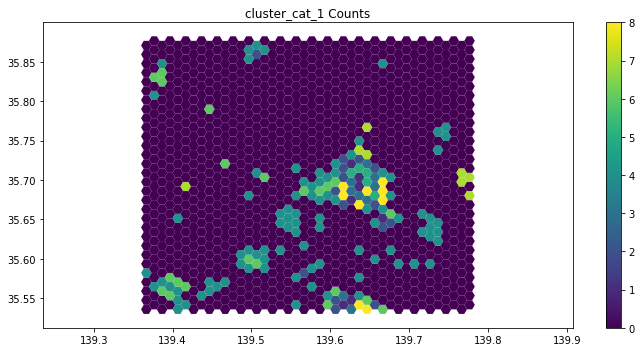

In [ ]:
# let's create some maps
fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,5))
fourDistrictCluster.plot(column='cluster_cat_1', legend=True, ax=ax1)
ax1.set_title('cluster_cat_1 Counts')
ax1.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

In [ ]:
%%script echo
filepath_tag_geojson = '/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/clustering/data/fourDistrictCluster.geojson'
fourDistrictCluster.to_file(filepath_tag_geojson, driver='GeoJSON')

In [ ]:
json_file_grid = open("/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/clustering/data/fourDistrictCluster.geojson", "r")
threeDistrictCluster = gpd.read_file(json_file_grid)
threeDistrictCluster

,cluster_cat_1,cluster_cat_2,cluster_cat_3,cluster_cat_4,geometry
0,0,0,0,0,"MULTIPOLYGON (((139.36000 35.53593, 139.36333 ..."
1,0,0,0,0,"MULTIPOLYGON (((139.36000 35.54747, 139.36333 ..."
2,0,2,0,0,"MULTIPOLYGON (((139.36000 35.55902, 139.36333 ..."
3,0,2,0,7,"MULTIPOLYGON (((139.36000 35.57057, 139.36333 ..."
4,4,4,4,7,"MULTIPOLYGON (((139.36000 35.58211, 139.36333 ..."
...,...,...,...,...,...
1255,0,0,0,0,"MULTIPOLYGON (((139.77000 35.83037, 139.77333 ..."
1256,0,0,0,0,"MULTIPOLYGON (((139.77000 35.84192, 139.77333 ..."
1257,0,0,0,0,"MULTIPOLYGON (((139.77000 35.85347, 139.77333 ..."
1258,0,0,0,0,"MULTIPOLYGON (((139.77000 35.86502, 139.77333 ..."


In [ ]:
cluster_data = fourDistrictCluster[['cluster_cat_1', 'cluster_cat_2', 'cluster_cat_3', 'cluster_cat_4']]
cluster_data.head(20)

,cluster_cat_1,cluster_cat_2,cluster_cat_3,cluster_cat_4
0,0,0,0,0
1,0,0,0,0
2,0,2,0,0
3,0,2,0,7
4,4,4,4,7
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,7
9,0,0,0,7


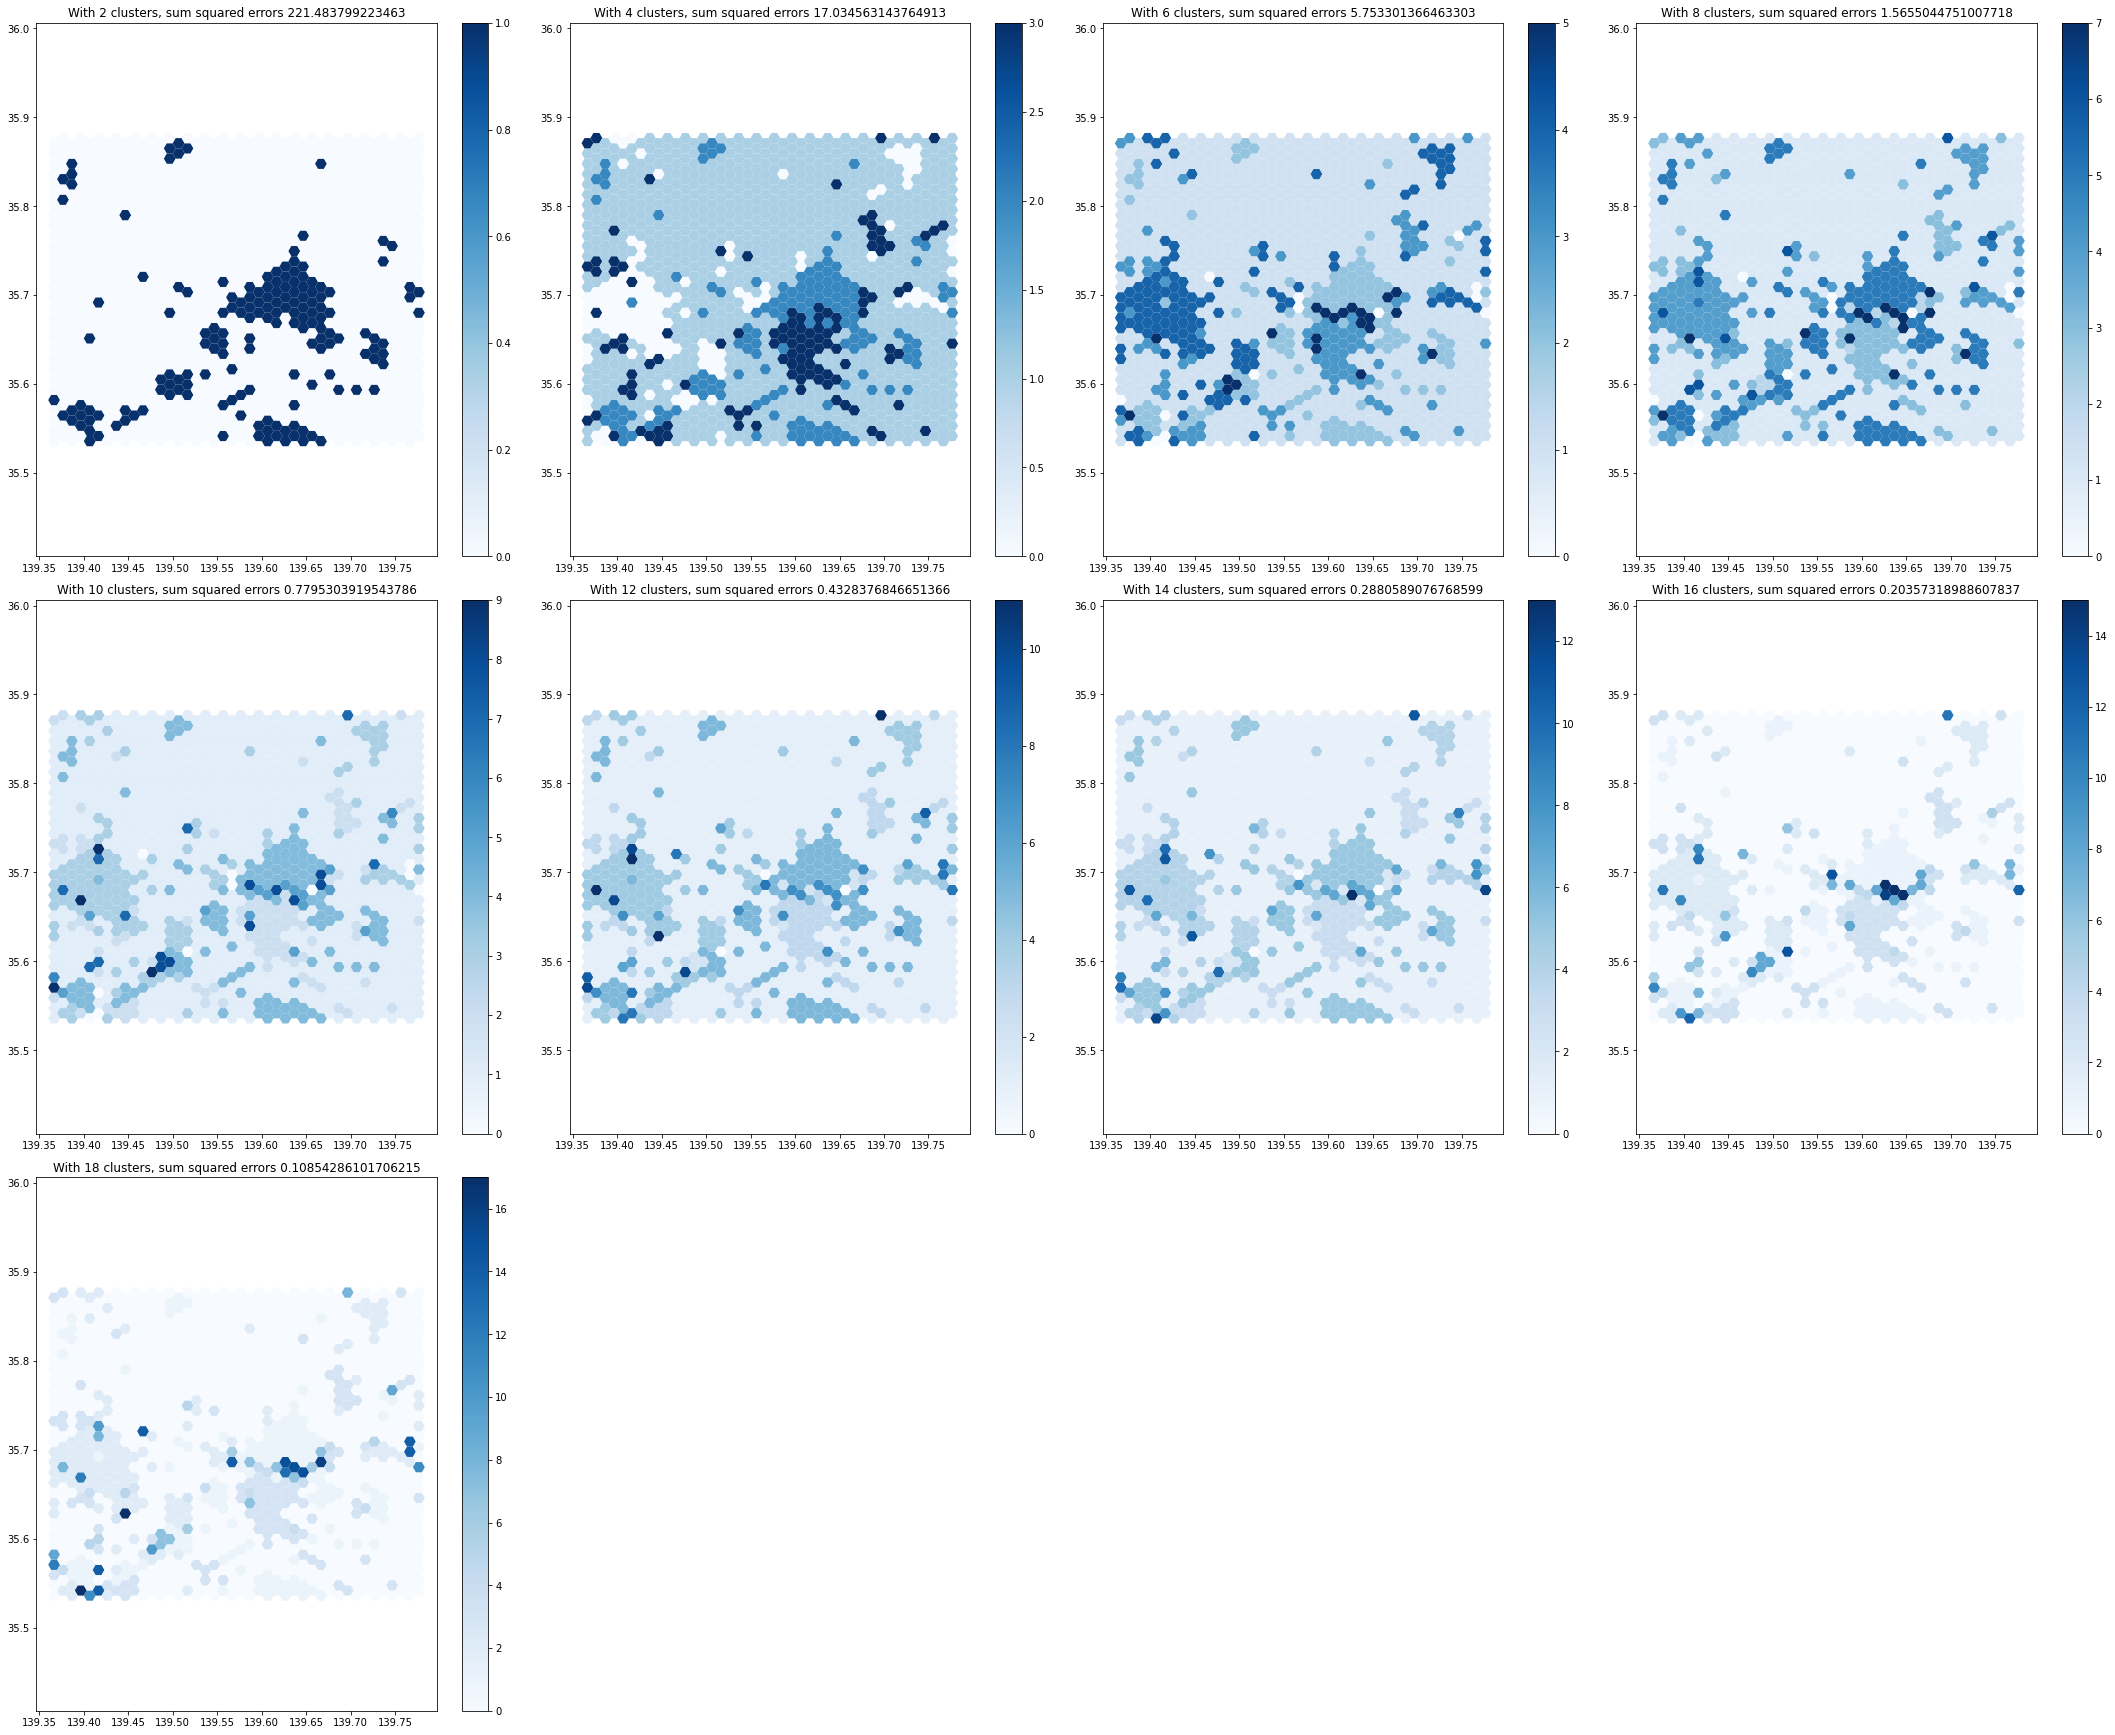

In [ ]:
plt.figure(figsize=(30,40))

ind = 0

# create dict to store scores
clusters = {
    'clusters': [],
    'score':[]
}

# normalize the data before running the model
norm_cluster_data = preprocessing.normalize(cluster_data)

for i in np.arange(2,20, 2):

    ax = plt.subplot(5,4, ind+1)
    
    ind+=1

    # run kmeans model
    
    km = KMeans(random_state=234,n_clusters=i).fit(norm_cluster_data)
    res=km.predict(norm_cluster_data)
    
    threeDistrictCluster['cluster_cat_merged'] = res

    # create title with number of clusters and MSE ( mean squared error )
    title = f'With {i} clusters, sum squared errors {km.inertia_}'
    # plot the viz
    threeDistrictCluster.plot(column='cluster_cat_merged', legend=True, figsize=(10,10), ax=ax, cmap='Blues')
    # set title
    ax.set_title(title)
    # aspect ratio
    ax.set_aspect('equal', adjustable='datalim')

    clusters['clusters'].append(i)
    clusters['score'].append(km.inertia_)

plt.tight_layout()
plt.show()

In [ ]:
# We can also create a function to graph and handle labels for us

def plot(x, y, ax, title, x_label, y_label):
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.plot(x, y)

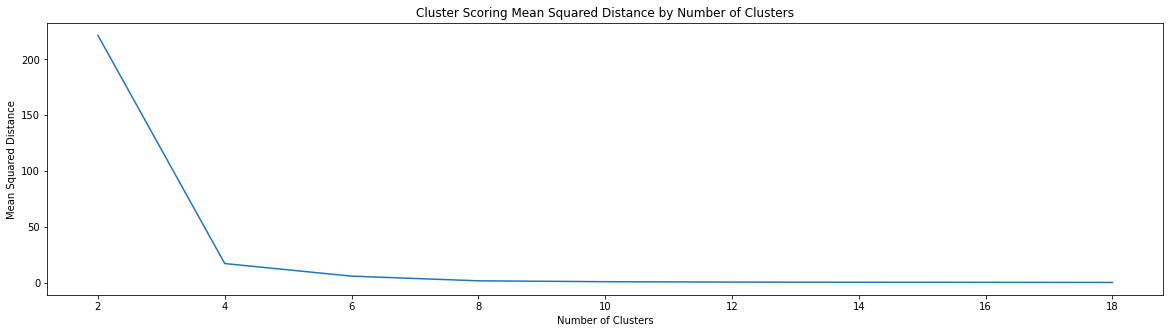

In [ ]:
cluster_scores = pd.DataFrame.from_dict(clusters, orient='index').transpose()
fig, ax = plt.subplots(figsize=(20,5))
plot(cluster_scores.clusters, cluster_scores.score, ax, 'Cluster Scoring Mean Squared Distance by Number of Clusters','Number of Clusters', 'Mean Squared Distance')

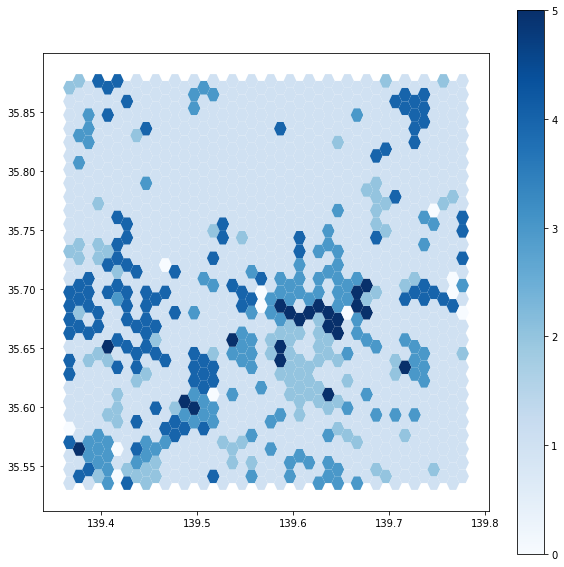

In [ ]:
optimal_number_clusters = 6

km = KMeans(random_state=234,n_clusters=optimal_number_clusters).fit(cluster_data)
res=km.predict(cluster_data)
fourDistrictCluster['cluster_cat_merged'] = res
fourDistrictCluster.plot(column='cluster_cat_merged', legend=True, cmap='Blues', figsize=(10,10));

In [ ]:
fourDistrictCluster

,cluster_cat_1,geometry,cluster_cat_2,cluster_cat_3,cluster_cat_4,cluster_cat_merged
0,0,"MULTIPOLYGON (((139.36000 35.53593, 139.36333 ...",0,0,0,1
1,0,"MULTIPOLYGON (((139.36000 35.54747, 139.36333 ...",0,0,0,1
2,0,"MULTIPOLYGON (((139.36000 35.55902, 139.36333 ...",2,0,0,1
3,0,"MULTIPOLYGON (((139.36000 35.57057, 139.36333 ...",2,0,7,4
4,4,"MULTIPOLYGON (((139.36000 35.58211, 139.36333 ...",4,4,7,0
...,...,...,...,...,...,...
1255,0,"MULTIPOLYGON (((139.77000 35.83037, 139.77333 ...",0,0,0,1
1256,0,"MULTIPOLYGON (((139.77000 35.84192, 139.77333 ...",0,0,0,1
1257,0,"MULTIPOLYGON (((139.77000 35.85347, 139.77333 ...",0,0,0,1
1258,0,"MULTIPOLYGON (((139.77000 35.86502, 139.77333 ...",0,0,0,1


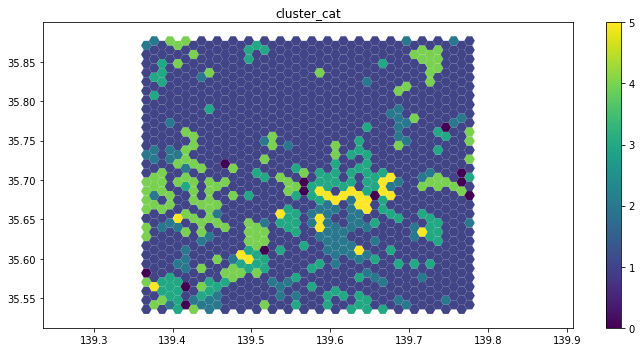

In [ ]:
# let's create some maps

fig, (ax1) = plt.subplots(ncols=1, sharex=False, sharey=False, figsize=(10,5))

fourDistrictCluster.plot(column='cluster_cat_merged', legend=True, ax=ax1)
ax1.set_title('cluster_cat')
ax1.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

In [ ]:
CombinedClusterGrid = fourDistrictCluster
#CombinedClusterGrid =CombinedClusterGrid[['geometry','cluster_cat_merged']]
CombinedClusterGrid

,cluster_cat_1,geometry,cluster_cat_2,cluster_cat_3,cluster_cat_4,cluster_cat_merged
0,0,"MULTIPOLYGON (((139.36000 35.53593, 139.36333 ...",0,0,0,1
1,0,"MULTIPOLYGON (((139.36000 35.54747, 139.36333 ...",0,0,0,1
2,0,"MULTIPOLYGON (((139.36000 35.55902, 139.36333 ...",2,0,0,1
3,0,"MULTIPOLYGON (((139.36000 35.57057, 139.36333 ...",2,0,7,4
4,4,"MULTIPOLYGON (((139.36000 35.58211, 139.36333 ...",4,4,7,0
...,...,...,...,...,...,...
1255,0,"MULTIPOLYGON (((139.77000 35.83037, 139.77333 ...",0,0,0,1
1256,0,"MULTIPOLYGON (((139.77000 35.84192, 139.77333 ...",0,0,0,1
1257,0,"MULTIPOLYGON (((139.77000 35.85347, 139.77333 ...",0,0,0,1
1258,0,"MULTIPOLYGON (((139.77000 35.86502, 139.77333 ...",0,0,0,1


In [ ]:
%%script echo
filepath_tag_geojson = '/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/clustering/data/CombinedClusterGrid.geojson'
CombinedClusterGrid.to_file(filepath_tag_geojson, driver='GeoJSON')

In [ ]:
CombinedClusterGrid


,cluster_cat_1,geometry,cluster_cat_2,cluster_cat_3,cluster_cat_4,cluster_cat_merged
0,0,"MULTIPOLYGON (((139.36000 35.53593, 139.36333 ...",0,0,0,1
1,0,"MULTIPOLYGON (((139.36000 35.54747, 139.36333 ...",0,0,0,1
2,0,"MULTIPOLYGON (((139.36000 35.55902, 139.36333 ...",2,0,0,1
3,0,"MULTIPOLYGON (((139.36000 35.57057, 139.36333 ...",2,0,7,4
4,4,"MULTIPOLYGON (((139.36000 35.58211, 139.36333 ...",4,4,7,0
...,...,...,...,...,...,...
1255,0,"MULTIPOLYGON (((139.77000 35.83037, 139.77333 ...",0,0,0,1
1256,0,"MULTIPOLYGON (((139.77000 35.84192, 139.77333 ...",0,0,0,1
1257,0,"MULTIPOLYGON (((139.77000 35.85347, 139.77333 ...",0,0,0,1
1258,0,"MULTIPOLYGON (((139.77000 35.86502, 139.77333 ...",0,0,0,1


normalizing the counts to compare in bar charts